# Optional 1: More Details about our Python Libraray Implementation 
---
- If you want to (and have time for) a deeper understanding of the **python libraries** or **physics/numerical** subtleties, feel free to explore the following exercises 
---

##### First, Let's import standard packages and settings...

In [1]:
# numpy: our main numerical package
# matplotlib and seaborn: our plotting packages
import matplotlib.pyplot as plt
import numpy as np

# some setup for the plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

### Exercise 1.1Py (Guided)
A `drift` is represented by a matrix with ones on the diagonal and the length of the drift on the upper right corner:

\begin{equation}
D=\left[
\begin{array}{c}
1\quad L\\
0\quad 1
\end{array}
\right],
\end{equation}

Such a matrix can be easily implemented by a 2x2 `numpy` matrix.

Show, numerically, that matrix-multiplying two such matrices, one with $L_1 = 0.5$ m and the other with $L_2 = 0.2$ m in the upper right corner, produces a matrix with the sum of the distances in the upper right corner (i.e. $L_1+L_2 = 0.7$ m).

#### SOLUTION
Even if we can prove it by hand, we take the opportunity to start learning how to use Numpy arrays in Python...

In [2]:
# Let's set our lengths
L_1 = 0.5
L_2 = 0.2

# we define the matrices (Numpy arrays)
# NOTA BENE: when defining a numpy 2D array (i.e. a matrix)
#            the innermost-array represent a row of our matrix
DRIFT_1 = np.array([[1, L_1], [0, 1]])
DRIFT_2 = np.array([[1, L_2], [0, 1]])

# let's see our matrices:
print(f"DRIFT 1:\n {DRIFT_1}")
print(f"DRIFT 2:\n {DRIFT_2}")

DRIFT 1:
 [[1.  0.5]
 [0.  1. ]]
DRIFT 2:
 [[1.  0.2]
 [0.  1. ]]


In [3]:
print(f"DRIFT 1+2:\n {DRIFT_1*DRIFT_2}")

DRIFT 1+2:
 [[1.  0.1]
 [0.  1. ]]


**QUESTION: what did we expect? is the solution provided by numpy correct?**

In [4]:
(DRIFT_1 * DRIFT_2)[0, 1] == L_1 + L_2

np.False_

**BE CAREFUL!** the `*` operator produces **"element-by-element" multiplication**, but here we are looking for a **"matrix multiplication"** operation.
The **`@` operator** is the "multiplication between matrices", introduced in python 3, which you should be using instead.

In [5]:
# => the @ operator is the "multiplication between matrices"
print(f"(correct) DRIFT 1+2:\n {DRIFT_1@DRIFT_2}")
(DRIFT_1 @ DRIFT_2)[0, 1] == L_1 + L_2

(correct) DRIFT 1+2:
 [[1.  0.7]
 [0.  1. ]]


np.True_

### Exercise 1.2Py (Guided)

**QUESTION: what is the difference between `DRIFT_2 @ DRIFT_1` and `DRIFT_1 @ DRIFT_2`? Is this important?**


Remember that the *final* coordinates of a particle, $\vec{x_s}$, are given as:

\begin{equation}
\vec{x_s} = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot \vec{x_0}
\end{equation}

where $\vec{x_0}$ are the initial coordinates, $M_1$ is the first element/matrix encountered by the particle, followed by $M_2$ ... $M_n$...

### Exercise 1.3Py

Repeat the previous exercises this time for two quadrupoles (using thin lens approximation!) with different focal length ($f_1 = 1$ and $f_2 = 2$)**, implementing the quadrupole matrices by yourself

#### SOLUTION

In [6]:
# let's define the focal lengths in two variables
f1 = 1
f2 = 2

# we define the matrices
Q_1 = np.array([[1, 0], [-1 / f1, 1]])
Q_2 = np.array([[1, 0], [-1 / f2, 1]])

# we multiply the matrices.
# NOTA BENE: the @ operator is the "multiplication between matrix"
Q_2 @ Q_1

array([[ 1. ,  0. ],
       [-1.5,  1. ]])

**Anything to observe?**

Since there is no drift between the two quadrupoles, this is equivalent to a quadrupole with focal length such that $1/f = 1/f1 + 1/f2$!

### Exercise 1.4Py

A single particle is described by a column vector containing its phase-space coordinates ($x$, $x'$):
\begin{equation}
\vec{x} = X = \left(
\begin{array}{c}
x \\
x'
\end{array}
\right).
\end{equation}

Describe a ray, or particle, that is on the optical axis with an angle $x' = 0.5$ mrad. 
Then, transport this particle to the end of a 2 m long drift using the matrix formalism. 

#### SOLUTION

Using numpy arrays, a column vector is represented by a 2D array with 2 rows and 1 column. 

If the particle is on the optical axis, then $x$ must be zero, while $x'$ is the given initial angle 

In [7]:
# in Python
x = 0  # initial position
xp = 0.5  # initial angle
X_0 = np.array([[x], [xp]])
print(f"Initial particle coordinates:\n {X_0}")

Initial particle coordinates:
 [[0. ]
 [0.5]]


In [8]:
# we build the drift as we did earlier on:
L = 2
DRIFT = np.array([[1, L], [0, 1]])

# and transport the initial particle to the end of the drift:
X_1 = DRIFT @ X_0
print(f"Final particle coordinates:\n {X_1}")

Final particle coordinates:
 [[1. ]
 [0.5]]


**Anything to observe?**

**Note:** Going through a drift of length $L$, the angle of the particle is not affected $x'_1 = x'_0 = 0.5$ mrad, while the final position is increased by $x_1 = x_0 + L * x'_0$ where $L=2$ m, i.e. $x_1 = 0 + 2*0.5 = 1$

### Exercise 1.5Py

Build the transfer matrix of a beam line made of a quadrupole with focal length $f = 2$ m followed by a drift of length $L = f = 2$ m.

Transport one particle that starts with an initial offset (e.g. $x_0$ = 0.4 mm) through such a system: 

1. What is the final position ($x_1$)? What did you expect?
2. Does the order of the matrix multiplication matter?

#### SOLUTION 1

In [9]:
# Let's define a quadrupole with focal length f
f = 2
QUAD = np.array([[1, 0], [-1 / f, 1]])

# Let's define a drift of length L=f
L = f
DRIFT = np.array([[1, L], [0, 1]])

# And our initial vector (parallel ray)
x = 0.4  # initial position
xp = 0  # initial angle
X_0 = np.array([[x], [xp]])

# And we propagate
X_1 = DRIFT @ QUAD @ X_0
print(f"Final particle coordinates:\n {X_1}")
print(f"Final particle x:\n {X_1[0,0]} mm")

Final particle coordinates:
 [[ 0. ]
 [-0.2]]
Final particle x:
 0.0 mm


- **NOTE: The particle arrives on the beam axis as expected!**

#### SOLUTION 2

In [10]:
# If we invert the order
X_1 = QUAD @ DRIFT @ X_0
print(f"Final particle coordinates:\n {X_1}")
print(f"Final particle x:\n {X_1[0,0]} mm")

Final particle coordinates:
 [[ 0.4]
 [-0.2]]
Final particle x:
 0.4 mm


- **NOTE: The order matters!** The first element seen by the beam that is expected to be the Quadrupole, hence its matrix has to be placed to the right hand side of the multiplication!

## Some more info about our libraries

### Modeling of a drift

Let's look at the function that generate a convenient representation of a **drift** that you can find in `tracking_library.py`: 

In [11]:
def D(L):
    """Returns a list containing a single "drift" of length L"""
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length
    return [{"matrix": np.array([[1, L], [0, 1]]), "length": L}]


# A drift of L=2 m can be generated as:
D(2)

[{'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

The main reason for returning such a `list` with inside a `dictionary` are:

- it will allow us to keep track of the path travelled by the particle (thanks to the `length` dictionary key)
- the element is embedded in a list so to allow for an easy concatenation of elements (e.g. D(1.2) + D(4.3) will produce a list with two elements: one representing a drift of L=1.2 and one of L=4.3 m).

In [12]:
# e.g. representation of a beamline made of two drifts of different length:
D(1) + D(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

> **Note:** this is just **one of many possible implementation** choices.
> One could think of different structures and ways to model a beamline.
> The scope of this course is not to give you a high-efficency and optimised tracking code, 
> but to **help you to understand** the basics of the underlying **accelerator physics**.

### Modeling of a quadrupole

In [13]:
def Q(f):
    """Returns a list containing a quadrupole with focal length f"""
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length
    return [{"matrix": np.array([[1, 0], [-1 / f, 1]]), "length": 0}]


# e.g. representation of a beamline made of one drift followed by one quadrupole:
D(1) + Q(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[ 1. ,  0. ],
         [-0.5,  1. ]]),
  'length': 0}]

### From a list of elements - or beamline - to an equivalent single element

A beam line (or a whole ring) is modelled by a series of matrices. Independently of the initial particle coordinates, we can compute a single matrix ($M_{eq.}$) that represents the whole beam line (or ring): 

\begin{equation}
X_s = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot X_0 = M_{eq.} \cdot X_0
\end{equation}

Given our choice of beamline strcuture, i.e. a `list` of **elements**, each modeled by a `dictionary` with some properties, we can define a useful function to compute the *equivalent* matrix $M_{eq.}$ (actually an *equivalent* **element** represented by a `dictionary` inside a `list`) of a whole beamline made of several **elements**:

In [14]:
def get_equivalent_element(beamline):
    """Returns the single element which is equivalent of the given beamline"""
    # we start from an identity matrix (np.eye)
    # with the same dimension of the matrix of the
    # first element of the beamline
    equivalentElement = np.eye(beamline[0]["matrix"].shape[0])
    length = 0
    # NB: we reverse the order of the beamline ([-1::-1])
    for elements in beamline[-1::-1]:
        # we multiply the matrices
        equivalentElement = equivalentElement @ elements["matrix"]
        # and we add the lengths
        length = length + elements["length"]
    # we return the dict with the "usual" keys (matrix and length) embedded in a
    #  list (with a single element), as for the definition of the D and Q functions
    return [{"matrix": equivalentElement, "length": length}]


# e.g. equivalent representation of a beamline made of two drifts of different length:
get_equivalent_element(D(1) + D(2))

[{'matrix': array([[1., 3.],
         [0., 1.]]),
  'length': 3}]

- **Note:** the final matrix is build starting from an identity matrix (`np.eye()`) that is multiplied to each beamline element matrix starting from the end: see the for loop: 
    > `for elements in beamline[-1::-1]`

### Tracking particles along a beamline

We can also write a function that "tracks" one, or several particles defined by their initial coordinate, along a beamline. 
The `transport_particles` function will create a list of particle coordinates for each location along the beam line, as well as a list of s positions.

In [15]:
def transport_particles(X_0, beamline, s_0=0):
    """Track the particle(s) `X_0` along the given `beamline`.
    If needed, one can specify an initial longitudinal position `s_0`, otherwise set to 0.

    It will return a dictionary containing the following key:values
       'x': a NxM numpy array with the M-particles x position for all N-elements of the beamline
       'xp': a NxM numpy array with the M-particles x' angles for all N-elements of the beamline
       's': a N-long numpy array with the longitudinal position of the N-elements of the beamline
       'coords': a Nx2xM numpy array with all M-particles coordinates (both x and x') at all N-elements of the beamline

    Disclaimer: if beamline is made of 5 elements, the output will have 5+1 "elements" as it will also
                return include the initial particle coordinates.
    """
    coords = [X_0]
    s = [s_0]
    for element in beamline:
        coords.append(element["matrix"] @ coords[-1])
        s.append(s[-1] + element["length"])
    coords = np.array(coords)
    s = np.array(s)
    return {
        "x": coords[:, 0, :],  # [s_idx, particle_idx]
        "xp": coords[:, 1, :],  # [s_idx, particle_idx]
        "s": s,  # [s_idx]
        "coords": coords,
    }  # [s_idx, coord_idx, particle_idx]

Text(0, 0.5, 'x [mm]')

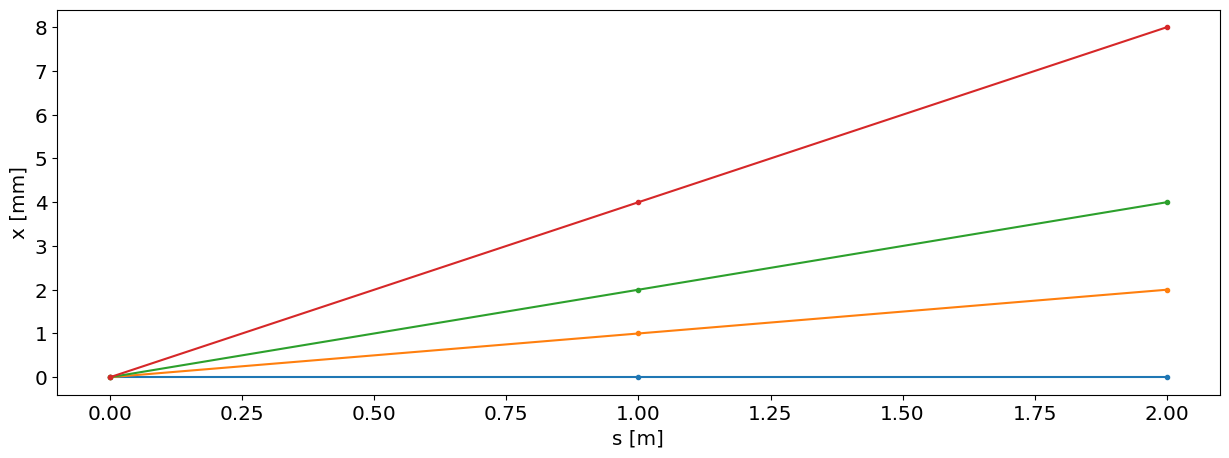

In [16]:
# e.g. define the intial coordinates for 3 particles all with
#      0 x position, but different angles:
X_0 = [[0, 0, 0, 0], [0, 1, 2, 4]]
# and let's transport them through a lattice made of 2 equally long drifts
tracked_data = transport_particles(X_0, D(1) + D(1))
# and plot the trajectories of all particles, i.e. x as a function of s:
plt.plot(tracked_data["s"], tracked_data["x"], ".-")
plt.xlabel("s [m]")
plt.ylabel("x [mm]")